In [ ]:
def format_params(number, precision=2, exponent_digits=2):
    # Format the number in scientific notation
    scientific = f"{number:.{precision}e}"
    # Split into base and exponent
    base, exponent = scientific.split("e")
    # Reformat the exponent with leading zeros
    exponent = int(exponent)  # Convert to integer
    formatted_exponent = f"e{'+' if exponent >= 0 else '-'}{abs(exponent):0{exponent_digits}d}"
    return f"{base}{formatted_exponent}"

#format_params(temperature, 0, 1)
'''
find ./data_mixture/ -type d -name "plt2000410"
 du -sh <folder dir>    #   check folder size
'''


'\nfind ./data_mixture/ -type d -name "plt2000410"\n du -sh <folder dir>    #   check folder size\n'

yt : [INFO     ] 2025-04-24 11:33:38,946 Parameters: current_time              = 400400.0
yt : [INFO     ] 2025-04-24 11:33:38,947 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-24 11:33:38,947 Parameters: domain_left_edge          = [-8.5 -8.5 -8.5]
yt : [INFO     ] 2025-04-24 11:33:38,948 Parameters: domain_right_edge         = [7.5 7.5 7.5]


4.4.0
[('boxlib', 'struct_fact_phi_phi'), ('boxlib', 'struct_fact_phi_rho'), ('boxlib', 'struct_fact_rho_rho'), ('boxlib', 'struct_fact_ufx_ufx'), ('boxlib', 'struct_fact_ufx_ufz'), ('boxlib', 'struct_fact_ufy_ufx'), ('boxlib', 'struct_fact_ufy_ufy'), ('boxlib', 'struct_fact_ufz_ufy'), ('boxlib', 'struct_fact_ufz_ufz')]
[[[0.87414495 0.91882864 0.9158772  ... 0.89691066 0.9158772  0.91882864]
  [0.8510808  0.90492447 0.90267543 ... 0.86968559 0.86052013 0.8640041 ]
  [0.89295374 0.88070774 0.87584137 ... 0.87047055 0.85977454 0.87700359]
  ...
  [0.88410111 0.86545173 0.85703286 ... 0.8297531  0.86992014 0.9141502 ]
  [0.89295374 0.87700359 0.85977454 ... 0.87558577 0.87584137 0.88070774]
  [0.8510808  0.8640041  0.86052013 ... 0.85616765 0.90267543 0.90492447]]

 [[0.87938913 0.89077654 0.88109095 ... 0.89476646 0.85889883 0.88205758]
  [0.87639026 0.89801968 0.88924064 ... 0.88497196 0.89600849 0.90054849]
  [0.91114692 0.89875267 0.85768323 ... 0.86210136 0.85811887 0.88304255]
  ..

NameError: name 'S_ufyx_array_kx' is not defined

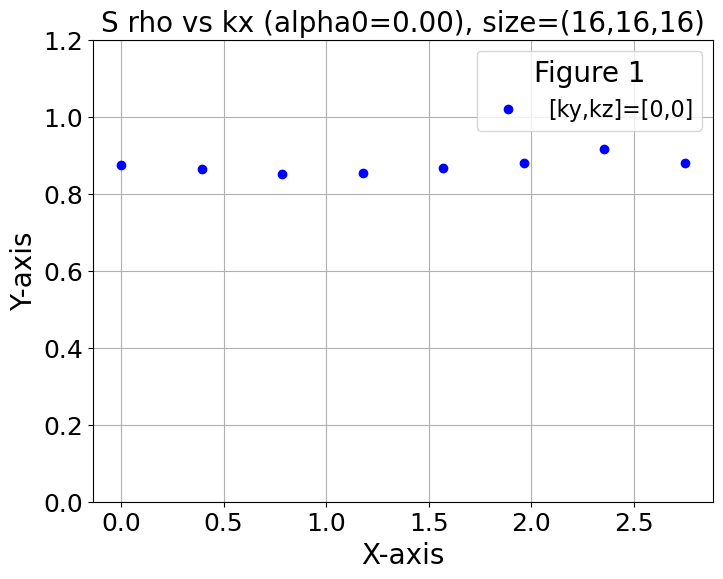

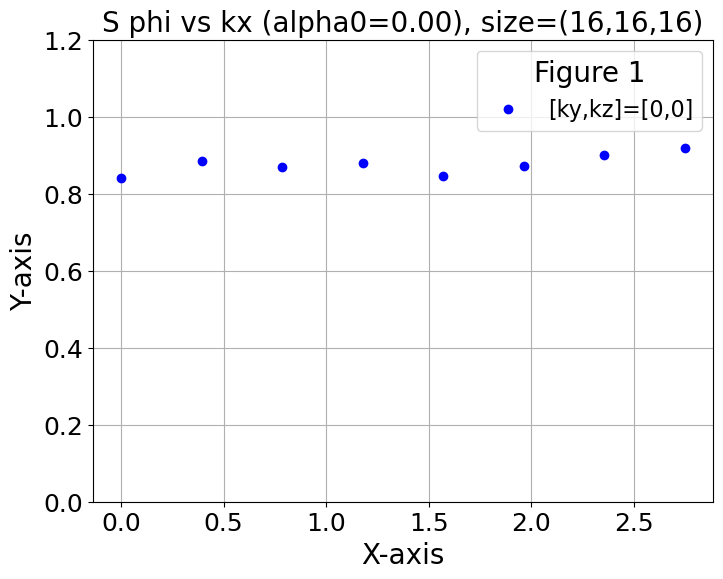

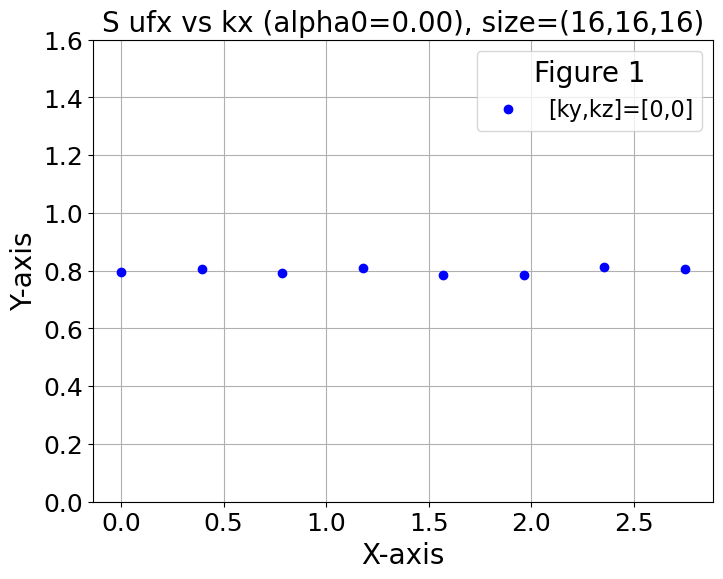

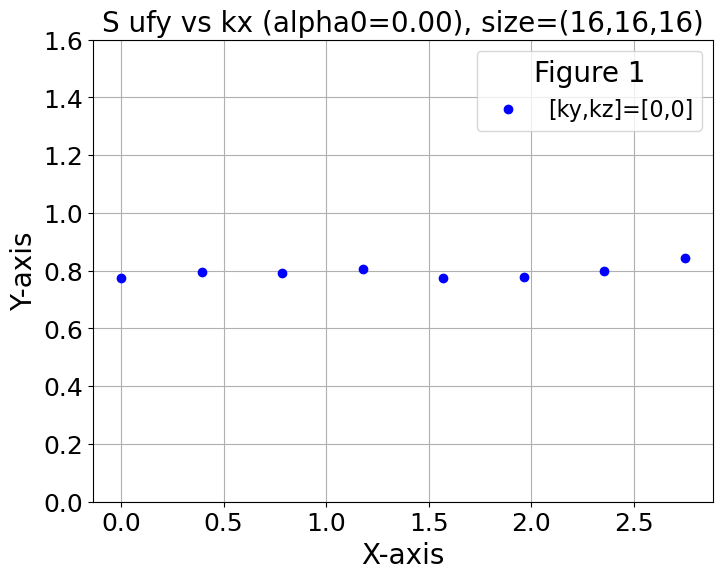

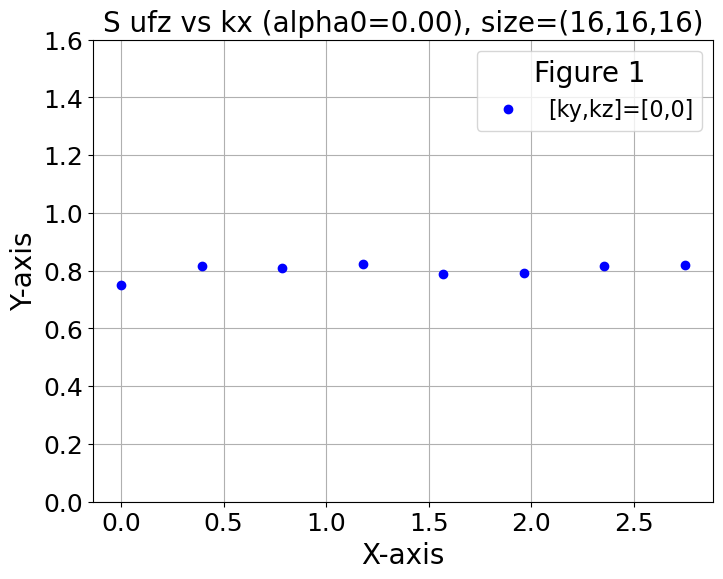

<Figure size 800x600 with 0 Axes>

In [3]:
import yt
from matplotlib import rc_context
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 20,           # General font size
    'axes.titlesize': 20,      # Axes title
    'axes.labelsize': 20,      # Axes labels
    'xtick.labelsize': 18,     # X-axis tick labels
    'ytick.labelsize': 18,     # Y-axis tick labels
    'legend.fontsize': 16,     # Legend
    'figure.titlesize': 18     # Figure title
})
print(yt.__version__)

############    modify if needed    ############################
step1 = 410
step_SF = 400400 #3500400   #900400
temperature = 1e-5
alpha0 = 0.
cs2 = 1./3.
nx = 16#64
ny = 16#2
nz = 16#2
#######################################################

plot_file_dir_SF_mag = "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt_SF_mag00".format(nx,ny,nz) +\
              f"{step_SF:07d}" # total 9 digits number for step info 
plot_file_dir_SF_real_imag = "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt_SF_real_imag00".format(nx,ny,nz) +\
              f"{step_SF:07d}"
ds = yt.load(plot_file_dir_SF_mag)
print(ds.field_list)
#profile_data = ds.all_data()[("boxlib", "struct_fact_rho_rho")].to_ndarray()
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
S_rho_FHDeX = profile_data["boxlib", "struct_fact_rho_rho"] # magnitude
S_phi_FHDeX = profile_data["boxlib", "struct_fact_phi_phi"] # magnitude
S_ufx_FHDeX = profile_data["boxlib", "struct_fact_ufx_ufx"] # magnitude
S_ufy_FHDeX = profile_data["boxlib", "struct_fact_ufy_ufy"] # magnitude 
S_ufz_FHDeX = profile_data["boxlib", "struct_fact_ufz_ufz"] # magnitude  
S_ufyx_FHDeX = profile_data["boxlib", "struct_fact_ufy_ufx"] # magnitude 
S_ufzy_FHDeX = profile_data["boxlib", "struct_fact_ufz_ufy"] # magnitude 

print((S_rho_FHDeX/(temperature/cs2)))

box = ds.domain_dimensions
nxh = box[0]//2
kx = 2*np.pi/box[0]*(np.linspace(0, nxh-1, nxh))
'''
S_rho_array_kx = np.mean(S_rho_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature/cs2)
S_phi_array_kx = np.mean(S_phi_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature/cs2)
S_ufx_array_kx = np.mean(S_ufx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufy_array_kx = np.mean(S_ufy_FHDeX[:,nxh%box[0]:(2*nxh-1)%box[0]+1,:], axis=(0, 2))/(temperature)
S_ufz_array_kx = np.mean(S_ufz_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufyx_array_kx = np.mean(S_ufyx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufzy_array_kx = np.mean(S_ufzy_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
'''
S_rho_array_kx = S_rho_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature/cs2)
S_phi_array_kx = S_phi_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature/cs2)
S_ufx_array_kx = S_ufx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)
S_ufy_array_kx = S_ufy_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)
S_ufz_array_kx = S_ufz_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)


plt.figure(1, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_rho_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S rho vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.2)
plt.grid(True)
plt.savefig('rho_f.png')  # You can use .png, .jpg, .pdf, .svg, etc.


plt.figure(2, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_phi_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S phi vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.2)
plt.grid(True)
plt.savefig('rho_g.png')

plt.figure(3, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufx_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufx vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
plt.savefig('ufx.png')

plt.figure(4, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufy_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufy vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
plt.savefig('ufy.png')

plt.figure(5, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufz_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufz vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
plt.savefig('ufz.png')

plt.figure(6, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufyx_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufyx vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,0.6)
plt.grid(True)

plt.figure(7, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufyx_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufzy vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,0.6)
plt.grid(True)

# Show the plot
plt.show()
#plt.savefig('my_plot.png', dpi=300)


In [ ]:
##############################
nx = 64
ny = 2
nz = 2
temperature = 1e-5
alpha0 = 0.
##############################

plot_file_dir_S_rho = "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) \
            + "_size{:d}-{:d}-{:d}_continue/correlation_rho".format(nx, ny, nz)

ds = yt.load(plot_file_dir_S_rho)
box = ds.domain_dimensions
print(ds.field_list)
#profile_data_S_rho = ds.all_data()[("boxlib", "S_rho")].to_ndarray()
profile_data_S_rho = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)

S_rho_array = profile_data_S_rho["boxlib", "S_rho"]
#S_rho_array = profile_data_S_rho["boxlib", "struct_fact_rho_rho"]

#S_rho_array = profile_data_S_rho.reshape(box[0],box[1],box[2])
#print(S_rho_array.max())
nxh = box[0]//2
kx = 2*np.pi/box[0]*(np.linspace(0, nxh-1, nxh))
S_rho_array_kx = S_rho_array[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature/cs2) # add 1 additional position
S_rho_array_kx_0_1 = S_rho_array[nxh%box[0]:(2*nxh-1)%box[0]+1,0,1]/(temperature/cs2) # add 1 additional position
S_rho_array_kx_1_0 = S_rho_array[nxh%box[0]:(2*nxh-1)%box[0]+1,1,0]/(temperature/cs2) # add 1 additional position
S_rho_array_kx_1_1 = S_rho_array[nxh%box[0]:(2*nxh-1)%box[0]+1,1,1]/(temperature/cs2) # add 1 additional position


# Plotting the data
plt.figure(figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_rho_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b')  # Create a line plot
#plt.plot(kx, S_rho_array_kx_0_1, label='[ky,kz]=[0,1]', marker='o', linestyle='', color='r')  # Create a line plot
#plt.plot(kx, S_rho_array_kx_1_0, label='[ky,kz]=[1,0]', marker='o', linestyle='', color='k')  # Create a line plot
#plt.plot(kx, S_rho_array_kx_1_1, label='[ky,kz]=[1,1]', marker='o', linestyle='', color='g')  # Create a line plot
plt.legend(title="Figure 1")
#ax.set_ylim(0, 2)  # Set y-axis range from -2 to 2

# Add labels and title
plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S rho vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title

# Add a legend
# Display the grid (optional)
plt.grid(True)
# Show the plot
plt.show()
plt.savefig('my_plot.png', dpi=300)

yt : [ERROR    ] 2025-02-21 15:08:33,529 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2025-02-21 15:08:33,531 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('./data_mixture/lbm_data_shshan_alpha0_0.00_xi_1.0e-05_size64-2-2_continue/correlation_rho',) {}, but could not load!

/tmp/ipykernel_312815/1981177052.py:24: ConversionWarning: Some errors were detected !
    Line #202 (got 2 columns instead of 1)
  rho_array = np.genfromtxt(plot_file_rho_mean, delimiter='\t', invalid_raise=False)
/tmp/ipykernel_312815/1981177052.py:25: ConversionWarning: Some errors were detected !
    Line #202 (got 2 columns instead of 1)
  phi_array = np.genfromtxt(plot_file_phi_mean, delimiter='\t', invalid_raise=False)


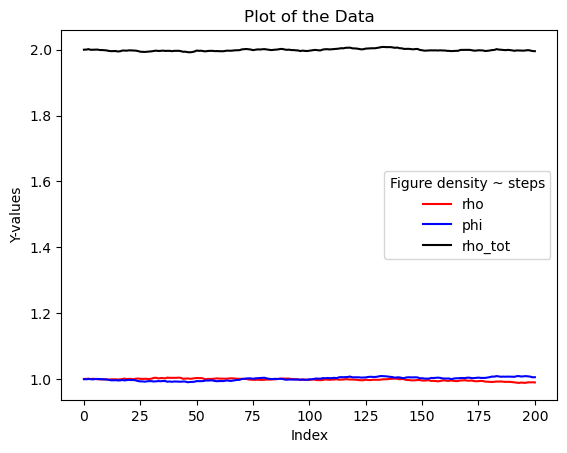

In [14]:
##############         DENSITY         ################
nx = 16#32 #64
ny = 16#32 #2
nz = 16#32 #2
temperature = 1e-5
alpha0 = 0.
#######################################################
import numpy as np

#plot_file_rho_mean = "./data_mixture/rho_steps.txt"
#plot_file_phi_mean = "./data_mixture/phi_steps.txt" # 2 currently uptp 2500400

plot_file_hydrovs_root = ""
if temperature > 0:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt".format(nx,ny,nz)
else:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)
folder_path = plot_file_hydrovs_root[:len(plot_file_hydrovs_root)-3]
plot_file_rho_mean = folder_path + "rho_steps.txt"
plot_file_phi_mean = folder_path + "phi_steps.txt"

rho_array = np.genfromtxt(plot_file_rho_mean, delimiter='\t', invalid_raise=False)
phi_array = np.genfromtxt(plot_file_phi_mean, delimiter='\t', invalid_raise=False)
step = np.arange(rho_array.shape[0])

step = np.arange(rho_array.shape[0])
plt.plot(step, rho_array, label="rho", color='r')
plt.plot(step, phi_array, label="phi", color='b')
plt.plot(step, rho_array + phi_array, label="rho_tot", color='k')
plt.legend(title="Figure density ~ steps")
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Y-values')  # Label for y-axis
plt.title('Plot of the Data')  # Title
plt.show()

In [ ]:
############    Generate mean density by given init steps & interval    ############################
step1 = 10000
step2 = 700000
plot_int = 5000 #10
temperature = 1e-5
alpha0 = 0.
cs2 = 1./3.
nx = 32
ny = 32
nz = 32
ncomp = 19  # nvel in LBM
###############################################################

Nframes = (step2 - step1)//plot_int + 1
density_ndarray = np.zeros((Nframes, 2, nx, ny, nz))

plot_file_hydrovs_root = ""
if temperature > 0:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt".format(nx,ny,nz)
else:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)


# load in noise multifab of each frame into ndarray
for n in range(step1, step2+1, plot_int):
    plot_file_fnoise = plot_file_hydrovs_root + f"{n:07d}"
    ds0 = yt.load(plot_file_fnoise)
    hydrovs_data_frame = ds0.covering_grid(
    level=0, left_edge=ds0.domain_left_edge, dims=ds0.domain_dimensions)
    #density_ndarray[(n-step1)//plot_int, 0, :,:,:] = hydrovs_data_frame["boxlib", "rho"]
    #density_ndarray[(n-step1)//plot_int, 1, :,:,:] = hydrovs_data_frame["boxlib", "phi"]
    rho_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "rho"])
    phi_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "phi"])

# Open the file in append mode and save data
plot_file_rho = plot_file_hydrovs_root[:len(plot_file_hydrovs_root)-3] + "rho_steps.txt"
plot_file_phi = plot_file_hydrovs_root[:len(plot_file_hydrovs_root)-3] + "phi_steps.txt"
#print(plot_file_rho)

with open(plot_file_rho, "a") as f:
    np.savetxt(f, phi_array, delimiter="\t", fmt="%.6f")
    f.write("\t")
with open(plot_file_phi, "a") as f:
    np.savetxt(f, rho_array, delimiter="\t", fmt="%.6f")
    f.write("\t")


yt : [INFO     ] 2025-03-13 00:38:22,210 Parameters: current_time              = 10000.0
yt : [INFO     ] 2025-03-13 00:38:22,211 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-03-13 00:38:22,211 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-13 00:38:22,212 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-03-13 00:38:22,359 Parameters: current_time              = 15000.0
yt : [INFO     ] 2025-03-13 00:38:22,360 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-03-13 00:38:22,361 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-13 00:38:22,362 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-03-13 00:38:22,529 Parameters: current_time              = 20000.0
yt : [INFO     ] 2025-03-13 00:38:22,530 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-03-13 00:38:22,531 Parameters: domain_left_edge          = [0. 0. 0

FileNotFoundError: No such file or directory: './data_mixture/lbm_data_shshan_alpha0_0.00_xi_1.0e-05_size32-32-32_continue/plt0105000'.

In [11]:
############    Generate mean density by looping over folder    ############################
import os
import re

temperature = 1e-5
alpha0 = 0.
cs2 = 1./3.
nx = 16#32
ny = 16#32
nz = 16#32
ncomp = 19  # nvel in LBM
###############################################################

plot_file_hydrovs_root = ""
if temperature > 0:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt".format(nx,ny,nz)
else:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)



# Specify the folder path
folder_path = plot_file_hydrovs_root[:len(plot_file_hydrovs_root)-3]
rho_array = []
phi_array = []
pattern = r"^plt\d+$"

# Loop through all files in the folder
for filename in sorted(os.listdir(folder_path)):  # Ensure order
    file_path = os.path.join(folder_path, filename)
    #print(f"Opening: {file_path}")  
    if re.match(pattern, filename):
        file_path = os.path.join(folder_path, filename)
        ds0 = yt.load(file_path)
        hydrovs_data_frame = ds0.covering_grid(
        level=0, left_edge=ds0.domain_left_edge, dims=ds0.domain_dimensions)    
        rho_array.append(np.mean(hydrovs_data_frame["boxlib", "rho"]))
        phi_array.append(np.mean(hydrovs_data_frame["boxlib", "phi"]))
    
plot_file_rho = folder_path + "rho_steps.txt"
plot_file_phi = folder_path + "phi_steps.txt"
with open(plot_file_rho, "w") as f: # overwrite mode
    np.savetxt(f, phi_array, delimiter="\t", fmt="%.6f")
    f.write("\t")
with open(plot_file_phi, "w") as f:
    np.savetxt(f, rho_array, delimiter="\t", fmt="%.6f")
    f.write("\t")
    

yt : [INFO     ] 2025-03-30 19:37:41,585 Parameters: current_time              = 2000.0
yt : [INFO     ] 2025-03-30 19:37:41,588 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-03-30 19:37:41,592 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-30 19:37:41,594 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-03-30 19:37:43,533 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-03-30 19:37:43,534 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-03-30 19:37:43,535 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-30 19:37:43,536 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-03-30 19:37:43,759 Parameters: current_time              = 6000.0
yt : [INFO     ] 2025-03-30 19:37:43,760 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-03-30 19:37:43,760 Parameters: domain_left_edge          = [0. 0. 0.]
